In [1]:
import os
import pickle
import re
from glob import glob
from ipywidgets import FloatProgress
from IPython.display import display
import matplotlib.pyplot as plt
import datetime

flag_dscrpt = {
        1 : 'NOT A DISTB MECH',
        2 : 'NO STATES DEFINED',
        3 : 'STATES HAS FROM 0 TO 1',
        4  : 'Atleast one POWER OF STATES is 0',
        5 : 'Errors in parsing BREAKPOINT to obtain powers', 
        11 : 'NO OUTPUT FROM HHAnalyse',
        19 : '#STATES != #OUTPUT FILES',
        30 : 'UNPARSE Unknown',
        31 : 'UNPARSE TextXSyntaxError',
        32 : 'UNPARSE TextXSemanticError',
        33 : 'UNPARSE AttributeError',
        50 : 'Temperature dependence',
        51 : 'No temp dependence',
        52
}

def get_flag_counts(mega_dict, flag_typs=[]):
    count = 0
    for channel in mega_dict:
        if 'red_flag' in mega_dict[channel]:
            if not flag_typs:
                count += 1
            else:
                for flag_typ in flag_typs:
                    if flag_typ in mega_dict[channel]['red_flag']:
                        count += 1 
    return count

def get_flag_channel(mega_dict, flag_typs=[]):
    channel_list = []
    for channel in mega_dict:
        if 'red_flag' in mega_dict[channel]:
            if not flag_typs:
                channel_list.append(channel)
            else:
                for flag_typ in flag_typs:
                    if flag_typ in mega_dict[channel]['red_flag']:
                        channel_list.append(channel)    
    return set(channel_list)

def show_progress(description, value):
    f = FloatProgress(min=0, max=100, description=description + ' : ')
    f.value = value
    return f

def print_progress(mega_dict, flg_typ):
    f_channels = get_flag_counts(mega_dict, [flg_typ])
    percent_f_cover = float(f_channels*100. / brkn_channel_count)
    print('Total number of broken channels : ', brkn_channel_count)
    print('Total number of ', flag_dscrpt[flg_typ], ' : ', f_channels)
    print('Percent of the failed : ', percent_f_cover)
    return show_progress(flag_dscrpt[flg_typ], percent_f_cover)

def fail_percent(mega_dict, flag_list):
    counts = []
    for flg in flag_list:
        counts.append(len(get_flag_channel(mega_dict, [flg])))
    counts = [(100.0 * ii) / len(mega_dict) for ii in counts]
    return counts

def make_plot():
    now = datetime.datetime.now()
    pos = [ii + 0.5 for ii in range(len(flag_dscrpt)+1)]
    values = [100.-percent_cover]
    colors = ['g']
    labels = ['ALL PASS']
    for key, value in flag_dscrpt.items():
        values.append(fail_percent(mega_dict, [key])[0])
        colors.append('r')
        labels.append(value)
    plt.figure(figsize=(10,10))
    bar_list = plt.barh(pos, values)
    for ii, bar in enumerate(bar_list):
        bar.set_color(colors[ii])
    plt.yticks(pos, labels)
    ax = plt.gca()
    ax.set_xlim(0,100)
    ax.set_xlabel('Percentage')
    plt.title(sub_channel + ' ' + now.strftime("%Y-%m-%d %H:%M"))
    #plt.savefig(sub_channel+'_coverage.png', dpi=150, bbox_inches='tight')
    plt.show()

In [6]:
sub_channel = 'icg-channels-Na'
with open(sub_channel+'.pkl', 'rb') as handle:
    mega_dict = pickle.load(handle)

brkn_channel_count = get_flag_counts(mega_dict)
percent_cover = float(brkn_channel_count)/len(mega_dict)*100.

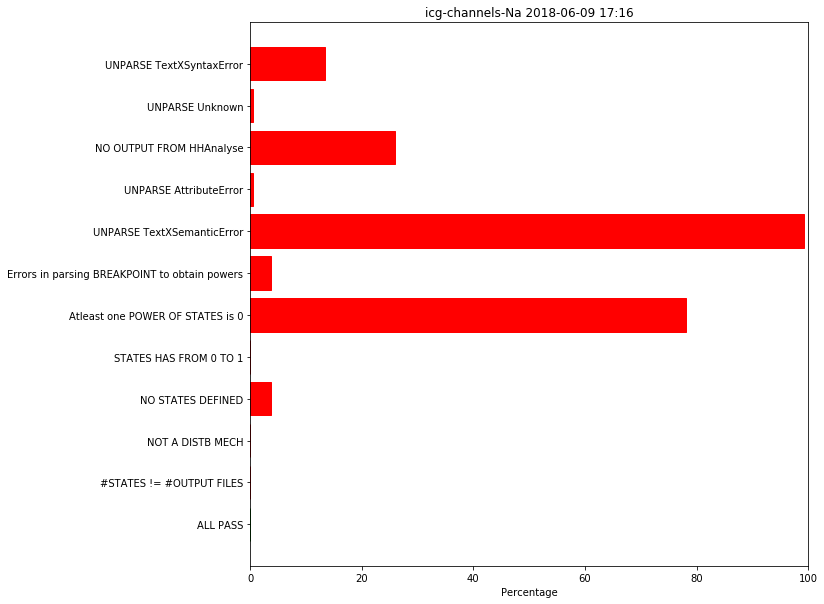

In [7]:
make_plot()

In [4]:
print('Total number of channels in, ', sub_channel, ' : ', len(mega_dict))
print('Total number of broken channels : ', brkn_channel_count)
print('Number of channels that are OKAY so far: ', len(mega_dict)-brkn_channel_count)
print('Percent of pass : ', percent_cover)
display(show_progress('Pass coverage', percent_cover))

Total number of channels in,  icg-channels-K  :  1211
Total number of broken channels :  1207
Number of channels that are OKAY so far:  4
Percent of pass :  99.66969446738233


A Jupyter Widget

In [5]:
display(print_progress(mega_dict, 32))
print(get_flag_channel(mega_dict, [32]))

Total number of broken channels :  1207
Total number of  UNPARSE TextXSemanticError  :  1191
Percent of the failed :  98.67439933719967


A Jupyter Widget

{'144520_ik1.mod', '184178_K_T.mod', '154732_km.mod', '185332_kslow.mod', '112359_hh3_icgK2.mod', '20015_ka.mod', '52034_kdrp.mod', '64229_kdrRT03_v2.mod', '122329_kcnq_gp.mod', '62284_B_A.mod', '119266_kadist.mod', '105385_kcnq_gp.mod', '144392_kdrca1.mod', '97917_ichan2_icgK2.mod', '155796_kdr.mod', '71312_kadist.mod', '184152_Kv2like.mod', '124063_Ganglion_hh_icgK2.mod', '2733_kslowtab.mod', '155602_bgka.mod', '83523_kfast.mod', '127351_kdr.mod', '116956_emdk.mod', '184327_Im_v2.mod', '147867_kad.mod', '3808_ia.mod', '149174_bgka.mod', '3493_kdr_moto.mod', '135839_kv.mod', '150621_Km.mod', '64212_kavn.mod', '18198_HH2.mod', '135903_kdrbwb.mod', '87546_kamt.mod', '62285_KDRI.mod', '185858_kdmc.mod', '184325_Im_v2.mod', '144392_kaprox.mod', '102288_Ikleakaxon.mod', '18197_HH.mod', '185858_IKM.mod', '182134_kdrca1.mod', '140249_HH_traub.mod', '147514_km.mod', '3660_kdrneosup.mod', '136715_hh_Cp_scaled.mod', '45539_k2.mod', '184180_Im.mod', '139150_hh3.mod', '180789_kpkj.mod', '20212_kv